In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,GRU,Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [5]:
ax_train = os.listdir(r'E:\Pose Detection\DATASET\Numpy_files\train')
actions_train = []
label_map_train = {}
ax_test = os.listdir(r'E:\Pose Detection\DATASET\Numpy_files\test')
actions_test = []
label_map_test = {}

In [6]:
for a in range(len(ax_train)):
    label_map_train[ax_train[a]]=a
    actions_train.append(ax_train[a])
for a in range(len(ax_test)):
    label_map_test[ax_test[a]]=a
    actions_test.append(ax_test[a])  
    
print(label_map_train,label_map_test)

{'downdog': 0, 'goddess': 1, 'plank': 2, 'tree': 3, 'warrior2': 4} {'downdog': 0, 'goddess': 1, 'plank': 2, 'tree': 3, 'warrior2': 4}


In [8]:
sequences_train, labels_train = [],[]
for axs_train in actions_train:
    for files in os.listdir(r'E:\\Pose Detection\\DATASET\\Numpy_files\\train\\'+axs_train):
        res = np.load(r'E:\\Pose Detection\\DATASET\\Numpy_files\\train\\'+axs_train+'\\'+files)
        sequences_train.append(res)
        labels_train.append(label_map_train[axs_train])
        #sequences_train.append(res)
        #labels_train.append(label_map_train[axs_train])
        
sequences_test, labels_test = [],[]
for axs_test in actions_test:
    for files in os.listdir(r'E:\\Pose Detection\\DATASET\\Numpy_files\\test\\'+axs_test):
        res = np.load(r'E:\\Pose Detection\\DATASET\\Numpy_files\\test\\'+axs_test+'\\'+files)
        sequences_test.append(res)
        labels_test.append(label_map_test[axs_test])
        #sequences_train.append(res)
        #labels_train.append(label_map_train[axs_train])
        

In [9]:
sequences_train, labels_train

([array([ 0.44169971,  0.69420141, -0.09643933,  0.99756598,  0.41644448,
          0.69556928, -0.13727593,  0.99820864,  0.41381678,  0.69110286,
         -0.13724305,  0.99852508,  0.41093677,  0.68618929, -0.13727501,
          0.99838078,  0.41674721,  0.69655025, -0.06926371,  0.99848878,
          0.41458511,  0.69313514, -0.06919787,  0.99862993,  0.41213214,
          0.68960536, -0.0691079 ,  0.99832648,  0.3947221 ,  0.63999408,
         -0.25793687,  0.99768627,  0.39538419,  0.64533156,  0.05554286,
          0.99741286,  0.44657883,  0.66788375, -0.13396567,  0.99527067,
          0.44799376,  0.66919333, -0.0431199 ,  0.99409962,  0.41469997,
          0.54382128, -0.3503094 ,  0.99741083,  0.4215335 ,  0.53700799,
          0.18525165,  0.99066609,  0.29820606,  0.71104318, -0.63419235,
          0.98712498,  0.29675278,  0.6897468 ,  0.28517509,  0.20591423,
          0.15806207,  0.83816481, -0.63967794,  0.96632898,  0.17981051,
          0.79926133,  0.01511231,  0.

In [12]:
len(sequences_train),len(labels_train)

(750, 750)

In [13]:
len(sequences_test),len(labels_test)

(250, 250)

In [15]:
print(np.array(sequences_train).shape)
print(np.array(sequences_test).shape)
print(np.array(labels_train).shape)
print(np.array(labels_test).shape)

(750, 132)
(250, 132)
(750,)
(250,)


In [16]:
train_x = np.array(sequences_train)
test_x = np.array(sequences_test) 
train_y = to_categorical(labels_train).astype(int)
test_y = to_categorical(labels_test).astype(int)

In [17]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(750, 132)
(750, 5)
(250, 132)
(250, 5)


In [18]:
log_dir = os.path.join('Dense_Neural_Network_Pose_Detection')
tb_callback = TensorBoard(log_dir = log_dir)

In [19]:
from keras.layers import LeakyReLU

# define the keras model
mod = Sequential()
mod.add(Dense(128, input_shape=(132,), activation='relu'))
mod.add(Dropout(0.3))
mod.add(Dense(128, activation = 'relu'))
mod.add(Dropout(0.3))
mod.add(Dense(64, activation = 'relu'))
mod.add(Dropout(0.3))
mod.add(Dense(32, activation = 'relu'))
mod.add(Dropout(0.3))
mod.add(Dense(5, activation='sigmoid'))

In [20]:
mod.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
mod.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               17024     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                

In [21]:
mod.fit(train_x, train_y, epochs = 50, batch_size=132,callbacks = [tb_callback] )
#scores = model.evaluate(test_x, test_y)

Epoch 1/50


6/6 [==============================] - 6s 43ms/step - loss: 1.6398 - accuracy: 0.2187
Epoch 2/50
6/6 [==============================] - 0s 17ms/step - loss: 1.5681 - accuracy: 0.3013
Epoch 3/50
6/6 [==============================] - 0s 20ms/step - loss: 1.5129 - accuracy: 0.3333
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 1.4438 - accuracy: 0.3747
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 1.3604 - accuracy: 0.3933
Epoch 6/50
6/6 [==============================] - 0s 18ms/step - loss: 1.2875 - accuracy: 0.4107
Epoch 7/50
6/6 [==============================] - 0s 17ms/step - loss: 1.2078 - accuracy: 0.4813
Epoch 8/50
6/6 [==============================] - 0s 18ms/step - loss: 1.1447 - accuracy: 0.4760
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0815 - accuracy: 0.5013
Epoch 10/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0176 - accuracy: 0.5573
Epoch 11/50
6/6 [==========

In [24]:
np.argmax(mod.predict(test_x[2].reshape(-1,132)))

1/1 [==============================] - 0s 240ms/step


0

In [47]:
predicted = [np.argmax(mod.predict(i.reshape(-1,132))) for i in test_x]

1/1 [==============================] - 0s 49ms/step


In [31]:
mod.save("Pose_detection.h5")

E:\Anaconda3\envs\pose_detection\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test

In [25]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import mediapipe as mp

In [26]:

mp_pose = mp.solutions.pose
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7,min_tracking_confidence=0.7)

# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils

In [27]:
def detectPose(image_pose, pose, draw=False, display=False):
    
    original_image = image_pose.copy()
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    resultant = pose.process(image_in_RGB)
    if resultant.pose_landmarks and draw:    
        mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                               thickness=3, circle_radius=3),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                               thickness=2, circle_radius=2))

    if display:
            
            plt.figure(figsize=[22,22])
            plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
            plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');
    
    else:
        pose_ = np.array(([[res.x,res.y,res.z,res.visibility] for res in resultant.pose_landmarks.landmark] )).flatten() if resultant.pose_landmarks else np.zeros(1404) 
        return np.concatenate([pose_])

1/1 [==============================] - 0s 64ms/step


'downdog'

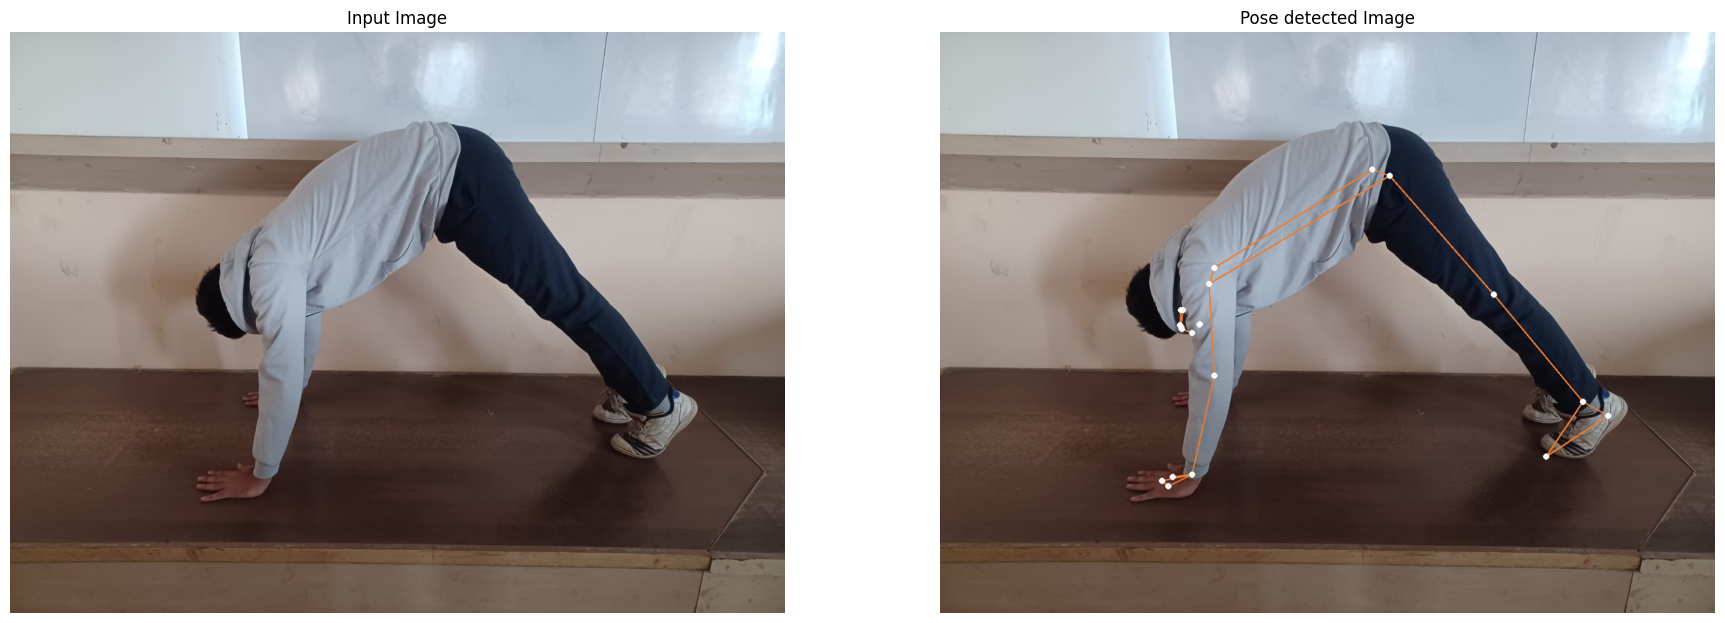

In [64]:
image_path = r'E:\Pose Detection\dummy\farid.jpg'
output = cv2.imread(image_path)
cc = detectPose(output, pose_image, draw=True, display=False)
detectPose(output, pose_image, draw=True, display=True)
labels = {}
for i in label_map_test.items():
    labels[i[1]] = i[0]
labels

labels[np.argmax(mod.predict(cc.reshape(-1,132)))]

In [62]:
cc.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
labels = {}
for i in label_map_test.items():
    labels[i[1]] = i[0]
labels

In [46]:
labels[np.argmax(mod.predict(cc.reshape(-1,132)))]

1/1 [==============================] - 0s 46ms/step


'tree'